# Possible Perception of Failure following Net Zero

In [1]:
# __authors__: Noah Diffenbaugh, Elizabeth Barnes and Patrick Keys
# __date__: May 18, 2022

In [2]:
import imp
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import datetime
from icecream import ic

import data_processing, plots, experiment_settings

import cartopy as ct
import palettable
from matplotlib.colors import ListedColormap
import matplotlib as mpl
mpl.rcParams["figure.facecolor"] = "white"
mpl.rcParams["figure.dpi"] = 150
savefig_dpi = 300
np.warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)
import warnings
warnings.filterwarnings("ignore")

FS = 10
plt.rc('text',usetex=True)
plt.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']}) 
plt.rc('savefig',facecolor='white')
plt.rc('axes',facecolor='white')
plt.rc('axes',labelcolor='dimgrey')
plt.rc('axes',labelcolor='dimgrey')
plt.rc('xtick',color='dimgrey')
plt.rc('ytick',color='dimgrey')

map_proj = ct.crs.EqualEarth(central_longitude = 0.)

In [3]:
EXP_NAME = "exp0"
settings = experiment_settings.get_settings(EXP_NAME)
TREND_YEARS_NETZERO = (settings["focus_year"],settings["focus_year"]+(settings["time_horizon"]-1))
TREND_YEARS_PREZERO = (settings["focus_year"]-settings["time_horizon"],settings["focus_year"]-1)

In [4]:
YEAR_RANGE = (2015,2100)
DATA_DIRECTORY = 'data/'
FIGURE_DIRECTORY = 'figures/'
SHAPE_DIRECTORY = 'shapefiles/'
POP_DIRECTORY = DATA_DIRECTORY + "popdynamics-1-8th-pop-base-year-projection-ssp-2000-2100-rev01-proj-ssp1-netcdf/SSP1/Total/NetCDF/"

## Get the data

In [5]:
imp.reload(data_processing)
# mask = data_processing.get_land_mask(DATA_DIRECTORY + 'sftlf_fx_CESM2-WACCM_historical_r1i1p1f1_gn.nc', var="sftlf")
da_all, filenames = data_processing.get_data(DATA_DIRECTORY, 
                                             YEAR_RANGE,
                                             N_MEMBERS = settings["n_members"], 
                                             filenames=settings["filenames"],
                                             ssp=settings["ssp"], 
                                             time_horizon=settings["time_horizon"]
                                            )

tas_Amon_ssp119_CNRM-ESM2-1_all_ncecat_ann_mean_2pt5degree.nc
tas_Amon_ssp119_CanESM5_all_ncecat_ann_mean_2pt5degree.nc
tas_Amon_ssp119_GISS-E2-1-G_all_ncecat_ann_mean_2pt5degree.nc
tas_Amon_ssp119_IPSL-CM6A-LR_all_ncecat_ann_mean_2pt5degree.nc
tas_Amon_ssp119_MIROC-ES2L_all_ncecat_ann_mean_2pt5degree.nc
tas_Amon_ssp119_MRI-ESM2-0_all_ncecat_ann_mean_2pt5degree.nc
tas_Amon_ssp119_UKESM1-0-LL_all_ncecat_ann_mean_2pt5degree.nc
tas_Amon_ssp119_MPI-ESM1-2-LR_all_ncecat_ann_mean_2pt5degree.nc
da_all.shape = (40, 86, 72, 144)


In [6]:
imp.reload(data_processing)

# --------------------------------
# PRE-ZERO trends
da_mean_trends_all_prezero = data_processing.compute_trends(da_all.mean("member"), YEAR_RANGE[0], settings["focus_year"]-1)
ic(da_mean_trends_all_prezero.shape)

da_trends_prezero = data_processing.compute_trends(da_all, TREND_YEARS_PREZERO[0], TREND_YEARS_PREZERO[1])
ic(da_trends_prezero.shape)

# --------------------------------
# NETZERO trends
da_mean_trends_all_netzero = data_processing.compute_trends(da_all.mean("member"), TREND_YEARS_NETZERO[0], YEAR_RANGE[1])
ic(da_mean_trends_all_netzero.shape)

da_trends_netzero = data_processing.compute_trends(da_all, TREND_YEARS_NETZERO[0], TREND_YEARS_NETZERO[1])
ic(da_trends_netzero.shape)


ic| da_mean_trends_all_prezero.shape: (2, 72, 144)
ic| da_trends_prezero.shape: (2, 40, 72, 144)
ic| da_mean_trends_all_netzero.shape: (2, 72, 144)
ic| da_trends_netzero.shape: (2, 40, 72, 144)


(2, 40, 72, 144)

In [7]:
error('here')

NameError: name 'error' is not defined

## Figure 1

In [ ]:
imp.reload(plots)
PLOT_MEMBER = settings["plot_member"]
MULT_FACTOR = 10
#------------------------
# fig = plt.figure(figsize=(13,3*3))
fig = plt.figure(figsize=(5.0*1.5*2,3.75*1.3*3))
spec = fig.add_gridspec(ncols=4, nrows=3, height_ratios=[.75,1,1], width_ratios=[1,.6,.6,1])
vbound = 0.15*MULT_FACTOR
#------------------------

ax = fig.add_subplot(spec[0,1:3])
plt.axvspan(TREND_YEARS_NETZERO[0], 2100, alpha=0.1, color='teal')   

global_mean_temp = data_processing.compute_global_mean(da_all)
plt.plot(global_mean_temp["time"]+.5,global_mean_temp.T, color='dimgray',linewidth=.5,alpha=.25)
plt.plot(global_mean_temp["time"]+.5,np.mean(global_mean_temp,0), color='k',linewidth=4., alpha=.75)

plots.format_spines(plt.gca())
ymin, ymax = plt.gca().get_ylim()
plt.xticks(np.arange(2010,2100,20),np.arange(2010,2100,20))
plt.yticks(np.arange(-10.0,10.0,.5),np.round(np.arange(-10.0,10.0,.5),2))
plt.ylabel('temperature anomalies (C)\nfrom 2015-2024')
# plt.xlabel('year')    
plt.xlim(2010,2100)
plt.ylim(-1.5,2.0)

plt.text(settings["focus_year"]+.5,-1.45,'Net-Zero',color="teal")
plt.title('(A) Global mean temperature')
#------------------------

for MASK_BOOL in (False,):
    for data_type in ("all","member"):
        for start_year in (2025, 2035):

            if data_type=="member":
                if start_year == 2025:            
                    da_plot = da_trends_prezero[0,PLOT_MEMBER,:,:].squeeze()  
                    title_text = "(D) Member \#" + str(PLOT_MEMBER+1) + " trends, " + str(TREND_YEARS_PREZERO[0]) + "-" + str(TREND_YEARS_PREZERO[1])               
                    specs = (2,0)
                elif start_year == 2035:
                    da_plot = da_trends_netzero[0,PLOT_MEMBER,:,:].squeeze()
                    title_text = "(E) Member \#" + str(PLOT_MEMBER+1) + " trends, " + str(TREND_YEARS_NETZERO[0]) + "-" + str(TREND_YEARS_NETZERO[1])               
                    specs = (2,2)
            elif data_type=="all":
                if start_year == 2025:            
                    da_plot = da_mean_trends_all_prezero[0,:,:].squeeze()            
                    title_text = "(B) Ensemble mean trends, " + "2015-" + str(settings["focus_year"]-1)  
                    specs = (1,0)
                elif start_year == 2035:
                    da_plot = da_mean_trends_all_netzero[0,:,:].squeeze()
                    title_text = "(C) Ensemble mean trends, " + str(settings["focus_year"]) + "-2100"
                    specs = (1,2)


            if MASK_BOOL:
                da_plot_member = da_plot * mask
                da_positive_trends = np.ceil(np.abs(da_plot_member.where(da_plot_member>=settings["warming_cutoff"],0.,drop=False)))
                da_positive_trends = da_positive_trends * mask
            else:
                da_plot_member = da_plot
                da_positive_trends = np.ceil(np.abs(da_plot_member.where(da_plot_member>=settings["warming_cutoff"],0.,drop=False)))        
            frac = data_processing.compute_global_mean( da_positive_trends )

            ax = fig.add_subplot(spec[specs[0],specs[1]:specs[1]+2],projection=map_proj)
            cb,image = plots.drawOnGlobe(ax, 
                              map_proj, 
                              data=da_plot_member*MULT_FACTOR, 
                              lats=da_plot_member["lat"],
                              lons=da_plot_member["lon"],
                              cmap='RdBu_r',
                              vmin= -vbound, 
                              vmax= vbound, 
                              inc=None, 
                              cbarBool=False, 
                              contourMap=[], 
                              contourVals = [], 
                              fastBool=True, 
                              extent='both',
                             )   
            ax.text(0,-50,str(int((100*frac).round())) + '\% of area warming',color='black', fontsize=8, transform=ct.crs.PlateCarree())

            image.set_clim(-vbound,vbound)
            ax.xaxis.set_visible(False)
            ax.yaxis.set_visible(False) 
            ax.set_title(title_text)

    # set colorbar        
    axs = fig.axes
    bounds = np.round(np.arange(-.2,.29,.1),3)*MULT_FACTOR
    cb = fig.colorbar(image, ax=axs, 
                      shrink=0.3, 
                      ticks=bounds,
                      location='bottom',
                      pad=.05,
                      extend='both',
                      label='degrees C per decade',
                     )
    cb.set_ticklabels(['-2', '-1', '0', '1', '2'])
    
    # plt.tight_layout() 
    plt.savefig(FIGURE_DIRECTORY + EXP_NAME + '_five_panel_trends_member' + str(PLOT_MEMBER) + '.png',  bbox_inches='tight', dpi=savefig_dpi)
    plt.show()

# Perceived Failures Frequency

In [ ]:
MASK_BOOL = False

cmap = ListedColormap(palettable.colorbrewer.qualitative.Paired_11.mpl_colors)
cmap = plots.get_qual_cmap()
cmap = palettable.colorbrewer.diverging.Spectral_8_r.mpl_colors
cmap = np.delete(cmap,(0,1,3,6),0)
cmap = ListedColormap(cmap)

fig = plt.figure(figsize=(9,3*2))

da_plot = da_trends_netzero[0,:,:,:].squeeze()
da_plot_prezero = da_trends_prezero[0,:,:,:].squeeze()
da_quad_check = None
for iq,quad in enumerate((2,1,3,4)):

    if(quad==1):
        da_quad = xr.where((da_plot_prezero>=settings["warming_cutoff"]) & (da_plot>=settings["warming_cutoff"]), 1, 0) 
        text_title = "(B) Continued Warming"
    elif(quad==2):
        da_quad = xr.where((da_plot_prezero<settings["warming_cutoff"]) & (da_plot>=settings["warming_cutoff"]), 1, 0) 
        text_title = "(A) Rebound Warming"        
    elif(quad==3):
        da_quad = xr.where((da_plot_prezero<settings["warming_cutoff"]) & (da_plot<settings["warming_cutoff"]), 1, 0) 
        text_title = "(C) Stabilization"                
    elif(quad==4):
        da_quad = xr.where((da_plot_prezero>=settings["warming_cutoff"]) & (da_plot<settings["warming_cutoff"]), 1, 0) 
        text_title = "(D) Recovery"                
    da_quad = da_quad.mean("member")
    if da_quad_check is None:
        da_quad_check = da_quad
    else:
        da_quad_check = da_quad_check + da_quad
    #---------------------
    if MASK_BOOL:
        da_plot_member = da_quad * mask
    else:
        da_plot_member = da_quad
    
    ax = fig.add_subplot(2,2,iq+1,projection=map_proj)
    cb,p = plots.drawOnGlobe(ax, 
                      map_proj, 
                      data=da_plot_member*100, 
                      lats=da_plot_member["lat"],
                      lons=da_plot_member["lon"],
                      cmap=cmap,
                      vmin= -5, 
                      vmax= 105, 
                      inc=None, 
                      cbarBool=False, 
                      contourMap=[], 
                      contourVals = [], 
                      fastBool=True, 
                      extent='both',
                     )   
    p.set_clim(10,90)
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    p.cmap.set_over('k')
    p.cmap.set_under('.9')
    cbar = plt.colorbar(p,ax=ax,label='\% of members',ticks=np.arange(10,90+20,20), extend="both",orientation='horizontal',pad=.025,shrink=.5)
    cbar.ax.set_xticklabels(np.arange(10,90+20,20)) 
    
    # p.set_clim(-5,105)
    # ax.xaxis.set_visible(False)
    # ax.yaxis.set_visible(False) 
    # plt.colorbar(p,ax=ax,label='\% of members')
    
    ax.set_title(text_title)
    
plt.tight_layout()
plt.savefig(FIGURE_DIRECTORY + EXP_NAME + '_quadrant_frequencies' + '.png', bbox_inches="tight", dpi=savefig_dpi)
plt.show()

## Perceived Failures and Maximum temperature exceedances

In [ ]:
fig = plt.figure(figsize=(5.0*2,3.75*1))
MASK_BOOL = False

#-----------------------------------------------------------------
# PERCEIVED FAILURES
ax = fig.add_subplot(1,2,1,projection=map_proj)
# cmap = plots.get_qual_cmap()
cmap = palettable.colorbrewer.diverging.Spectral_8_r.mpl_colors
cmap = np.delete(cmap,(0,1,3,6),0)
cmap = ListedColormap(cmap)


da_plot = da_trends_netzero[0,:,:,:].squeeze()
da_plot_prezero = da_trends_prezero[0,:,:,:].squeeze()

da_quad_1 = xr.where((da_plot_prezero>=settings["warming_cutoff"]) & (da_plot>=settings["warming_cutoff"]), 1, 0) 
da_quad_2 = xr.where((da_plot_prezero<settings["warming_cutoff"]) & (da_plot>=settings["warming_cutoff"]), 1, 0) 
da_quad_3 = xr.where((da_plot_prezero<settings["warming_cutoff"]) & (da_plot<settings["warming_cutoff"]), 1, 0) 
da_quad_4 = xr.where((da_plot_prezero>=settings["warming_cutoff"]) & (da_plot<settings["warming_cutoff"]), 1, 0) 
da_quad = (da_quad_1 + da_quad_2).sum("member")/len(da_plot["member"].values)

#---------------------
if MASK_BOOL:
    da_plot_member = da_quad * mask
else:
    da_plot_member = da_quad
da_plot_member = da_plot_member*100
    
cb,p = plots.drawOnGlobe(ax, 
                  map_proj, 
                  data=da_plot_member, 
                  lats=da_plot_member["lat"],
                  lons=da_plot_member["lon"],
                  cmap=cmap,
                  vmin=-5,
                  vmax= 105, 
                  inc=None, 
                  cbarBool=False, 
                  contourMap=[], 
                  contourVals = [], 
                  fastBool=True, 
                  extent='both',
                 )   
   
p.set_clim(10,90)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
p.cmap.set_over('k')
p.cmap.set_under('.9')
cbar = plt.colorbar(p,ax=ax,label='\% of members',ticks=np.arange(10,90+20,20), extend="both",orientation='horizontal',pad=.025,shrink=.7)
cbar.ax.set_xticklabels(np.arange(10,90+20,20)) 

ax.set_title('(A) Probability of perceived failure\nover ' + str(settings["time_horizon"]) + ' year horizon')     

#-----------------------------------------------------------------
# MAXIMUM EXCEEDANCES
ax = fig.add_subplot(1,2,2,projection=map_proj)
cmap = ListedColormap(palettable.colorbrewer.sequential.OrRd_9.mpl_colors)
cmap = cmap.colors
cmap = np.insert(cmap, 0, [[.9, .9, .9,]],axis=0)
cmap = np.append(cmap, [[0., 0., 0.,]],axis=0)
cmap = cmap[(2,4,6,8),:]
cmap = ListedColormap(cmap)

max_netzero_plot = None
for PLOT_MEMBER in range(da_trends_netzero.shape[1]):
    da_plot = da_all[PLOT_MEMBER,:,:,:].squeeze()
    
    iyears = np.where(((da_plot["time"]<=TREND_YEARS_PREZERO[1])))[0]
    # print(da_plot["time"][iyears])
    max_temps = da_plot[iyears,:,:].max("time")

    iyears = np.where(((da_plot["time"]>=TREND_YEARS_NETZERO[0])) & (da_plot["time"]<=TREND_YEARS_NETZERO[1]))[0]
    # print(da_plot["time"][iyears])
    max_netzero = xr.where(da_plot[iyears,:,:]>max_temps,1.0,0.0)
    max_netzero = max_netzero.max("time")
    if max_netzero_plot is None:
        max_netzero_plot = max_netzero
    else:
        max_netzero_plot = max_netzero_plot + max_netzero

cb,p = plots.drawOnGlobe(ax, 
                  map_proj,
                  # data=max_netzero_plot*mask/(np.shape(da_trends_netzero)[1])*100,
                  data=max_netzero_plot/(np.shape(da_trends_netzero)[1])*100,
                  lats=da_plot["lat"],
                  lons=da_plot["lon"],
                  cmap=cmap,
                  vmin= -5, 
                  vmax= 105, 
                  inc=None, 
                  cbarBool=False, 
                  contourMap=[], 
                  contourVals = [], 
                  fastBool=True, 
                  extent='both',
                 ) 
p.set_clim(10,90)
p.cmap.set_under('.9')
p.cmap.set_over('k')
ax = plt.gca()
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False) 
cbar = plt.colorbar(p,ax=ax,label='\% of members',ticks=np.arange(0,110,10), extend='both',orientation='horizontal',pad=.025,shrink=.7)
cbar.ax.set_xticklabels(np.arange(0,110,10)) 
ax.set_title('(B) Probability of temperature exceedance\nover ' + str(settings["time_horizon"]) + ' year horizon')     

#-----------------------------------------------------------------
plt.tight_layout()
plt.savefig(FIGURE_DIRECTORY + EXP_NAME + '_perceived_failures_maximum_exceedance' + '.png', bbox_inches="tight", dpi=savefig_dpi)
plt.show()

# Time series Quadrants for paper

In [ ]:
# reg_locs = {
#             # "Berlin": (52.5200, 13.4050),
#             # "Delhi": (28.7041,77.1025),
#             # "Shanghai": (31.2304, 121.4737),
#             # "Chicago": (41.8781, 360-87.6298),
#             # "Sao Paolo": (-23.5558, 360-46.6396),
#             # "Lagos": (6.5244, 3.3792),
#             # "Johannesburg": (-26.2041, 28.0473),
#             # "Los Angeles": (34.0522, 360-118.2437),
#             # "Washington D.C.": (38.9072, 360-77.0369),
#             # "Mumbai": (19.0760, 72.8777),    
#             # "Dubai": (25.2048,55.2708),
#             # "London": (51.5072,360-0.1276),
#             # "WestAntarctic": (-80,360-30),
#             # "San Francisco": (37.7749,360-122.4194),
#             "Beijing": (39.9042,116.4074),
#            }

# PLOT_MEMBERS = (3,6,9,0)
# panel_letters = ('A','B','C','D')

# for reg in reg_locs.keys():
#     lat = reg_locs[reg][0]
#     lon = reg_locs[reg][1]
    
#     plt.subplots(2,2,figsize=(10,5))
    
#     for iens, ens in enumerate(PLOT_MEMBERS):
#         da = da_all[ens,:,:,:].squeeze()

#         ilat = np.argmin(np.abs(da["lat"].values-lat))
#         ilon = np.argmin(np.abs(da["lon"].values-lon))

#         ax = plt.subplot(2,2,iens+1)
        
#         ax.axvspan(settings["focus_year"], 2100, alpha=0.1, color='teal')   
        
#         # plot all members
#         plt.plot(da["time"]+.5,da_all[:,:,ilat,ilon].T,
#                  color = 'dimgray',
#                  alpha=.25,
#                  linewidth=.75,
#                 )

#         # plot specific member
#         plt.plot(da["time"]+.5,da[:,ilat,ilon],
#                  color = 'black',
#                  linewidth=4.,
#                  alpha=.75,
#                 )
#         # plot control period
#         trend_years = np.arange(TREND_YEARS_PREZERO[0],TREND_YEARS_PREZERO[1]+1)
#         plt.plot(trend_years+.5,trend_years*da_trends_prezero[0,ens,ilat,ilon].values+da_trends_prezero[1,ens,ilat,ilon].values,
#                  '-',
#                  color='orange',
#                  linewidth=5,
#                  alpha=.75,
#                 )
#         # plot NETZERO period
#         trend_years = np.arange(TREND_YEARS_NETZERO[0],TREND_YEARS_NETZERO[1]+1)
#         # print(da_reg[ens,iyears,0,ilat,ilon].values)
#         plt.plot(trend_years+.5,trend_years*da_trends_netzero[0,ens,ilat,ilon].values+da_trends_netzero[1,ens,ilat,ilon].values,
#                  '-',
#                  color='teal',
#                  linewidth=5,
#                  alpha=.75,
#                 )

#         # print(10*da_prezero_reg[ens,0,ilat,ilon].values, 10*da_reg[ens,iyears,0,ilat,ilon].values)
#         plots.format_spines(plt.gca())
#         ymin, ymax = plt.gca().get_ylim()
#         plt.xticks(np.arange(2010,2100,20),np.arange(2010,2100,20))
#         plt.yticks(np.arange(10.0+273.15,50.0+273.15,1),np.round(np.arange(10.0,50.0,1)))
#         plt.ylabel('temperature (C)')
#         plt.xlabel('year')    
#         plt.xlim(2015,2100)
#         plt.ylim(ymin,ymax)

#         i = np.where(da["time"]==2046)[0]
#         plt.text(2020,ymax-.3, str(panel_letters[iens]),color="dimgray",fontsize=14)
#         plt.text(2025,ymin+.75,'member \#' + str(ens+1),color="k")
#         plt.text(2035.5,ymin+.1,'NETZERO ',color="teal")
        
#     plt.suptitle(reg,fontsize=20)        
#     plt.tight_layout()
#     plt.savefig(FIGURE_DIRECTORY + 'example_timeseries_ensmember_quadrants_' + reg + '_netzero' + str(settings["focus_year"]) + '.png', bbox_inches="tight", dpi=savefig_dpi)
#     plt.show() 
#     # plt.close()

## Population and GDP figures

In [8]:
#---------------------------------------------------
# GET POPULATION
#---------------------------------------------------
# processing the raw population data and regrid it
# imp.reload(data_processing)
# for decade in (2020,2030,2040,2050,2060,2070,2080,2090):
#     da_pop_regrid = data_processing.get_population(POP_DIRECTORY + "ssp1_" + str(decade) + ".nc", da_all)
#     da_pop_regrid.to_netcdf(DATA_DIRECTORY + '/ssp1_' + str(decade) + '_2.5x2.5.nc')

#---------------------------------------------------
# GET GDP
#---------------------------------------------------
# [m1] conda install -c conda-forge geopandas pygeos regionmask
# import geopandas as gpd
# import regionmask

# SHAPE_DIRECTORY = 'shapefiles/'
# regs_shp = gpd.read_file(SHAPE_DIRECTORY + 'ne_10m_admin_0_countries.shp')  

# mask_country = regionmask.mask_geopandas(regs_shp, np.arange(0,360,.1), np.arange(-90,90,.1))
# mask_country.to_netcdf(SHAPE_DIRECTORY + 'countries_10m_tenthDegreeGrid.nc')

# plt.imshow(mask_country,cmap="Accent")
# plt.colorbar()
# plt.show()
# print(np.unique(mask_country),len(np.unique(mask_country)))

# mask_country = regionmask.mask_geopandas(regs_shp, da_pop_regrid.lon, da_pop_regrid.lat)
# mask_country.to_netcdf(SHAPE_DIRECTORY + 'countries_10m_2.5x2.5.nc')

# plt.imshow(mask_country,cmap="Accent")
# plt.colorbar()
# plt.show()
# print(np.unique(mask_country),len(np.unique(mask_country)))

da_pop_regrid = xr.load_dataarray(DATA_DIRECTORY + '/ssp1_' + str(settings["pop_year"]) + '_2.5x2.5.nc')
gdp, regs_shp, country_mask = data_processing.get_gdp(SHAPE_DIRECTORY, DATA_DIRECTORY, settings["gdp_year"])


In [ ]:
MASK_BOOL = False

fig = plt.figure(figsize=(5.0*2*1.5,3.75*1.5),)#constrained_layout=True) #gridspec_kw={'width_ratios': [3, 2]})
spec = fig.add_gridspec(ncols=2, nrows=5, width_ratios=[3,2])
#------------------------------------------------------------------------------------
# PLOT POPULATION FOR ONE MEMBER
ax = fig.add_subplot(spec[:,0],projection=map_proj)

PLOT_MEMBER = settings["plot_member"]
SCALING = 1e6
cmap = mpl.cm.get_cmap("Spectral_r",8)
cmap = cmap(np.linspace(0, 1, 8))[1:,:]
cmap = mpl.colors.LinearSegmentedColormap.from_list("mycmap", cmap,8)

da_plot = da_trends_netzero[0,:,:,:].squeeze()
da_plot_prezero = da_trends_prezero[0,:,:,:].squeeze()

da_plot = da_plot[PLOT_MEMBER,:,:]
da_plot_prezero = da_plot_prezero[PLOT_MEMBER,:,:]

da_quad_1 = xr.where((da_plot_prezero>=settings["warming_cutoff"]) & (da_plot>=settings["warming_cutoff"]), 1, 0) 
da_quad_2 = xr.where((da_plot_prezero<settings["warming_cutoff"]) & (da_plot>=settings["warming_cutoff"]), 1, 0) 
da_quad = da_quad_1 + da_quad_2
da_quad = da_quad*da_pop_regrid.where(da_pop_regrid!=0, np.nan)/(SCALING)
if MASK_BOOL:
    da_plot_member = da_quad * mask
else:
    da_plot_member = da_quad 
da_plot_member = da_plot_member.where(da_plot_member!=0, -999)

cb,p = plots.drawOnGlobe(ax, 
                  map_proj,
                  data=da_plot_member, 
                  lats=da_plot_member["lat"],
                  lons=da_plot_member["lon"],
                  cmap=cmap,
                  vmin= 0.001, 
                  vmax= 2, 
                  inc=None, 
                  cbarBool=False, 
                  contourMap=[], 
                  contourVals = [], 
                  fastBool=True, 
                  extent='both',
                 )         

p.cmap.set_under('.9')
p.set_clim(0.00,2)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False) 
cbar = plt.colorbar(p,ax=ax,label='millions of people',ticks=np.arange(0,2.25,.25), orientation='horizontal',pad=.02,extend='max',shrink=.7)
# cbar = plt.colorbar(p,ax=ax,label='millions of people',ticks=np.arange(0,2.25,.25), orientation='horizontal',pad=.02,extend='max',shrink=.4)
cbar.ax.set_xticklabels(np.arange(0,2.25,.25)) 

failure_frac = (100*(SCALING*da_quad.sum(("lat","lon")))/da_pop_regrid.sum(("lat","lon"))).values    
ax.text(0,-60,str(int(failure_frac.round())) + '\% of global population',color='black', fontsize=8, transform=ct.crs.PlateCarree())        

ax.set_title('(A) Populations experiencing perceived failure\nover ' + str(settings["time_horizon"]) + ' year horizon; member \#' + str(PLOT_MEMBER+1))

#------------------------------------------------------------------------------------
# PLOT PROBABILITY vs GDP
ax1 = fig.add_subplot(spec[1:4,1])

FAILURE_FRAC = .1
SCALING = 1e6
np.random.seed(15)

da_plot = da_trends_netzero[0,:,:,:].squeeze()
da_plot_prezero = da_trends_prezero[0,:,:,:].squeeze()

da_quad_1 = xr.where((da_plot_prezero>=settings["warming_cutoff"]) & (da_plot>=settings["warming_cutoff"]), 1, 0) 
da_quad_2 = xr.where((da_plot_prezero<settings["warming_cutoff"]) & (da_plot>=settings["warming_cutoff"]), 1, 0) 
da_quad_3 = xr.where((da_plot_prezero<settings["warming_cutoff"]) & (da_plot<settings["warming_cutoff"]), 1, 0) 
da_quad_4 = xr.where((da_plot_prezero>=settings["warming_cutoff"]) & (da_plot<settings["warming_cutoff"]), 1, 0) 
da_quad = (da_quad_1 + da_quad_2)
# da_quad = (da_quad_1 + da_quad_2).sum("member")/len(da_plot["member"].values)

gdp_matrix = np.zeros((gdp.shape[0],5))*np.nan
for icountry in np.arange(0,gdp.shape[0]):
    
    admin = gdp["Region"][icountry]
    gdp_matrix[icountry,0] = gdp[str(settings["gdp_year"])][icountry]

    try:
        i = regs_shp[regs_shp["ADM0_A3"]==admin].index.values[0]
    except:
        continue
    da_country = country_mask.where(country_mask==i,np.nan)*0.0+1.

    da_pop = da_country*da_pop_regrid
    gdp_matrix[icountry,2] = da_pop.sum(("lat","lon")).values

    gdp_matrix[icountry,3] = i
        
    for member in range(da_all.shape[0]):
        x = da_quad[member,:,:].sum(("lat","lon"))

        total_pop = da_pop.sum(("lat","lon"))
        failure_pop = ((da_pop*da_quad[member,:,:]).sum(("lat","lon")))/total_pop    
        gdp_matrix[icountry,4] = np.nansum((gdp_matrix[icountry,4],(da_pop*da_quad[member,:,:]).sum(("lat","lon")).values/da_all.shape[0]))
        # gdp_matrix[icountry,4] = np.nansum((gdp_matrix[icountry,4],failure_pop/da_all.shape[0]))
        # print(x.values,failure_pop.values,total_pop.values)    
    
        if failure_pop > FAILURE_FRAC:
            gdp_matrix[icountry,1] = np.nansum((gdp_matrix[icountry,1],1./da_trends_netzero.shape[1]))

ax1.scatter(gdp_matrix[:,0],gdp_matrix[:,1]*100,
            s=gdp_matrix[:,4]/(SCALING),
            # s=gdp_matrix[:,4]*500,
            alpha=.3,
            color="tab:purple",
           )
for i in range(gdp_matrix.shape[0]):
    if gdp_matrix[i,2]/SCALING > 120.:
        ax1.annotate(regs_shp["ADM0_A3"][gdp_matrix[i,3]], 
                     (gdp_matrix[i,0], gdp_matrix[i,1]*100*(1+np.random.randn(1)/15)),
                     fontsize=7,
                     color="k",
                     alpha=.75,
                    )
        # print(regs_shp["ADM0_A3"][gdp_matrix[i,3]])
        # print(gdp_matrix[i,:])
    
ax1.set_ylim(0,1.)
ax1.set_xlim(1,5e5)
ax1.set_xscale('log')
ax1.set_xlabel('GDP-PPP (log)')
ax1.set_ylabel('\% of members')

#--------------------------------------------------------
# # population legend
fs = 6
ax1.scatter((2e5,2e5,2e5),(2,8,21),
            s=(10,100,1000,),
            alpha=.3,
            color='white', 
            edgecolor="gray",
           )        
ax1.annotate('10 million', (1.75e5,2),color='dimgray',fontsize=fs,horizontalalignment='right', verticalalignment='center')
ax1.annotate('100 million',(1.5e5,8),color='dimgray',fontsize=fs,horizontalalignment='right', verticalalignment='center')
ax1.annotate('1 billion',  (0.9e5,21),color='dimgray',fontsize=fs,horizontalalignment='right', verticalalignment='center')   
ax1.annotate('avg. population \nexperiencing\n perceived failure',  (2e5,36),color='dimgray',fontsize=fs,horizontalalignment='center', verticalalignment='center')   
#--------------------------------------------------------    

ax1.set_yticks(np.arange(0,120,20),np.arange(0,120,20))
# ax = plt.gca()
# labels = ax.get_xticklabels()
ax1.set_xticks((1e0,1e1,1e2,1e3,1e4,1e5,),('10$^0$','10$^1$','10$^2$','10$^3$','10$^4$','10$^5$',))
ax1.set_title('(B) Countries experiencing perceived failure\nover ' + str(settings["time_horizon"]) + ' year horizon')
plots.format_spines(ax1)

plt.savefig(FIGURE_DIRECTORY + EXP_NAME + '_population_gdp_probability_member' + str(PLOT_MEMBER) + '.png' , bbox_inches="tight", dpi=savefig_dpi)


# Hovmoller over time horizon

In [ ]:
YEAR_VEC      = np.arange(TREND_YEARS_NETZERO[0],YEAR_RANGE[1]+1)
fail_grid     = np.zeros((len(YEAR_VEC),len(da_all["lat"])))*np.nan
fail_grid_fix = np.zeros((len(YEAR_VEC),len(da_all["lat"])))*np.nan

for iyear, year in enumerate(YEAR_VEC):
    if iyear > 0:
        hov_trends = data_processing.compute_trends(da_all, TREND_YEARS_NETZERO[0], year)
        da_plot = hov_trends[0,:,:,:].squeeze()
        da_quad_1 = xr.where((da_plot>=settings["warming_cutoff"]), 1, 0) 
        da_quad = (da_quad_1).sum("member")/len(da_plot["member"].values)   
        fail_grid[iyear,:] = da_quad.mean("lon")*100

    if year <= YEAR_RANGE[1] - (settings["time_horizon"]-1):
        hov_trends = data_processing.compute_trends(da_all, year, year+(settings["time_horizon"]-1))
        da_plot = hov_trends[0,:,:,:].squeeze()
        da_quad_1 = xr.where((da_plot>=settings["warming_cutoff"]), 1, 0) 
        da_quad = (da_quad_1).sum("member")/len(da_plot["member"].values)   
        fail_grid_fix[iyear,:] = da_quad.mean("lon")*100  


In [ ]:
cmap = palettable.colorbrewer.diverging.Spectral_9_r.mpl_colors
# cmap = np.delete(cmap,(0,1,3,6),0)
cmap = ListedColormap(cmap)

#----------------------------- 
fig = plt.figure(figsize=(14*.75,4*.75))

# plot progressively add years
ax = fig.add_subplot(1,2,1)
p = plt.pcolor(YEAR_VEC,da_all["lat"],fail_grid.T,cmap=cmap)
plt.axvline(x=settings["netzero_year"],color='dimgray',linestyle='--',linewidth=1)

plt.ylabel('latitude (deg. N)')
plt.xlabel('end year of time horizon')
plt.xticks(np.arange(TREND_YEARS_NETZERO[0],YEAR_RANGE[1],10),np.arange(TREND_YEARS_NETZERO[0],YEAR_RANGE[1],10))
plt.yticks(np.arange(-80,100,20),np.arange(-80,100,20))

p.set_clim(0.0,90)
p.cmap.set_over('k')
cbar = plt.colorbar(p,ax=plt.gca(),label='mean percent failure (\%)',ticks=(0,10,20,30,40,50,60,70,80,90), extend="max",orientation='vertical',pad=.02,shrink=.7)
cbar.ax.set_yticklabels(('0','10','20','30','40','50','60','70','80','90+'))
plt.title('(A) Extending horizon starting in ' + str(settings["focus_year"]))

# plot moving time_horizon window
ax = fig.add_subplot(1,2,2)
p = plt.pcolor(YEAR_VEC,da_all["lat"],fail_grid_fix.T,cmap=cmap)
plt.axvline(x=settings["netzero_year"],color='dimgray',linestyle='--',linewidth=1)

plt.ylabel('latitude (deg. N)')
plt.xlabel('start year of time horizon')
plt.xticks(np.arange(TREND_YEARS_NETZERO[0],YEAR_RANGE[1],10),np.arange(TREND_YEARS_NETZERO[0],YEAR_RANGE[1],10))
plt.yticks(np.arange(-80,100,20),np.arange(-80,100,20))
plt.title('(B) Moving horizon of length ' + str(settings["time_horizon"]) + ' years')

p.set_clim(0.0,90)
p.cmap.set_over('k')
cbar = plt.colorbar(p,ax=plt.gca(),label='mean percent failure (\%)',ticks=(0,10,20,30,40,50,60,70,80,90), extend="max",orientation='vertical',pad=.02,shrink=.7)
cbar.ax.set_yticklabels(('0','10','20','30','40','50','60','70','80','90+'))

plt.tight_layout()
plt.savefig(FIGURE_DIRECTORY + EXP_NAME + '_timeprogression_pcolor_failures' + '.png' , bbox_inches="tight", dpi=savefig_dpi)
plt.show() 

# Population histograms/PDFS

In [9]:
YEAR_VEC      = np.arange(TREND_YEARS_NETZERO[0],YEAR_RANGE[1]+1)
fail_grid_fix = np.zeros((len(YEAR_VEC), len(da_all["member"])))*np.nan

for iyear, year in enumerate(YEAR_VEC):
    if year>=2090:
        break
    # print(year,int(np.round((year+settings["time_horizon"]/2)/10)*10))
    pop_year = xr.load_dataarray(DATA_DIRECTORY + '/ssp1_' + str(int(np.round((year+settings["time_horizon"]/2)/10)*10)) + '_2.5x2.5.nc')

    hov_trends = data_processing.compute_trends(da_all, year, year+(settings["time_horizon"]-1))
    da_plot = hov_trends[0,:,:,:].squeeze()
    da_quad_1 = xr.where((da_plot>=settings["warming_cutoff"]), 1, 0) 
    da_quad = da_quad_1*pop_year.where(da_pop_regrid!=0, np.nan)
    fail_grid_fix[iyear,:] = 100*da_quad.sum(("lat","lon"))/pop_year.sum(("lat","lon"))


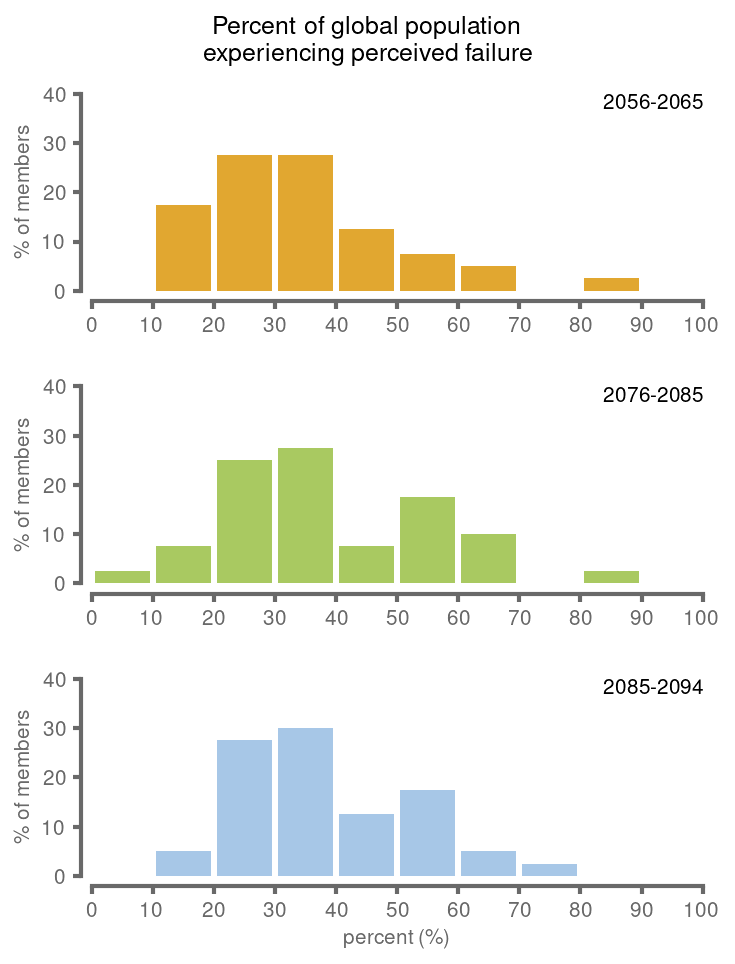

In [16]:
colors = ('#D95980','#E1A730','#A9C961','#A7C7E7',) #A7C7E7 #C3B1E1
plot_years = (2025,2056,2076,2085)
x_plot = np.arange(0,101,1)

fig = plt.figure(figsize=(5,2*len(plot_years)))
count = 0
for i,year in enumerate(plot_years):
    
    j = np.where(YEAR_VEC==year)[0]
    if len(fail_grid_fix[j,:])==0:
        continue
    count = count + 1
    ax = fig.add_subplot(len(plot_years),1,count)        
    
    heights, bins = np.histogram(fail_grid_fix[j,:], np.arange(0,110,10))
    # plt.hist(h.T, np.arange(0,110,10),rwidth=.95,color=colors[i])
    plt.bar(bins[:-1]+(bins[1]-bins[0])/2,heights/da_all.shape[0]*100,width=9,color=colors[i])
    plots.format_spines(ax)
    plt.xticks(np.arange(0,110,10),np.arange(0,110,10))
    plt.yticks(np.arange(0,120,10),np.arange(0,120,10))
    plt.ylim(0,40)
    plt.xlim(0,100)    
    plt.ylabel('\% of members') 
    plt.text(100,40,str(year)+'-'+str(year+settings["time_horizon"]-1),color="k",verticalalignment='top',horizontalalignment='right')
    
plt.suptitle('Percent of global population\nexperiencing perceived failure')     
plt.xlabel('percent (\%)')

plt.tight_layout()
plt.savefig(FIGURE_DIRECTORY + EXP_NAME + '_population_histogram' + '.png' , bbox_inches="tight", dpi=savefig_dpi)
plt.show()


# GDP histograms

In [17]:
PLOT_YEARS = (2025,2056,2076,2085)
fail_grid_fix = np.zeros((len(PLOT_YEARS), len(da_all["member"])))*np.nan

for iyear, year in enumerate(PLOT_YEARS):

    pop_file_year = int(np.round((year+settings["time_horizon"]/2)/10)*10)
    pop_filename = '/ssp1_' + str(pop_file_year) + '_2.5x2.5.nc'
    pop_year = xr.load_dataarray(DATA_DIRECTORY + pop_filename)
    print(pop_filename)
    
    gdp, regs_shp, country_mask = data_processing.get_gdp(SHAPE_DIRECTORY, DATA_DIRECTORY, pop_file_year)
    
    print(year,year+(settings["time_horizon"]-1))
    hov_trends = data_processing.compute_trends(da_all, year, year+(settings["time_horizon"]-1))
    da_plot = hov_trends[0,:,:,:].squeeze()
    da_quad = xr.where((da_plot>=settings["warming_cutoff"]), 1, 0) 

    
    # country_stats = (country index, gdp of country, total country population, gdp weighted by population with failure)
    gdp_matrix = np.zeros((gdp.shape[0],da_all.shape[0],4))*np.nan
    for icountry in np.arange(0,gdp.shape[0]):

        admin = gdp["Region"][icountry]
        gdp_matrix[icountry,:,1] = gdp[str(pop_file_year)][icountry]

        try:
            i = regs_shp[regs_shp["ADM0_A3"]==admin].index.values[0]
        except:
            continue
        gdp_matrix[icountry,:,0] = i        
        da_country = country_mask.where(country_mask==i,np.nan)*0.0+1.

        da_pop = da_country*da_pop_regrid
        gdp_matrix[icountry,:,2] = da_pop.sum(("lat","lon")).values

        for member in range(da_all.shape[0]):
            x = da_quad[member,:,:].sum(("lat","lon"))

            total_pop = da_pop.sum(("lat","lon"))
            failure_pop = ((da_pop*da_quad[member,:,:]).sum(("lat","lon")))/total_pop    
            gdp_matrix[icountry,member,3] = failure_pop*gdp_matrix[icountry,0,1] # fraction of GDP
    
    fail_grid_fix[iyear,:] = np.nansum(gdp_matrix[:,:,3],axis=0) / gdp.sum().values[0]

    print(gdp_matrix.shape)
print(fail_grid_fix.shape)

/ssp1_2030_2.5x2.5.nc
2025 2034
(174, 40, 4)
/ssp1_2060_2.5x2.5.nc
2056 2065
(174, 40, 4)
/ssp1_2080_2.5x2.5.nc
2076 2085
(174, 40, 4)
/ssp1_2090_2.5x2.5.nc
2085 2094
(174, 40, 4)
(4, 40)


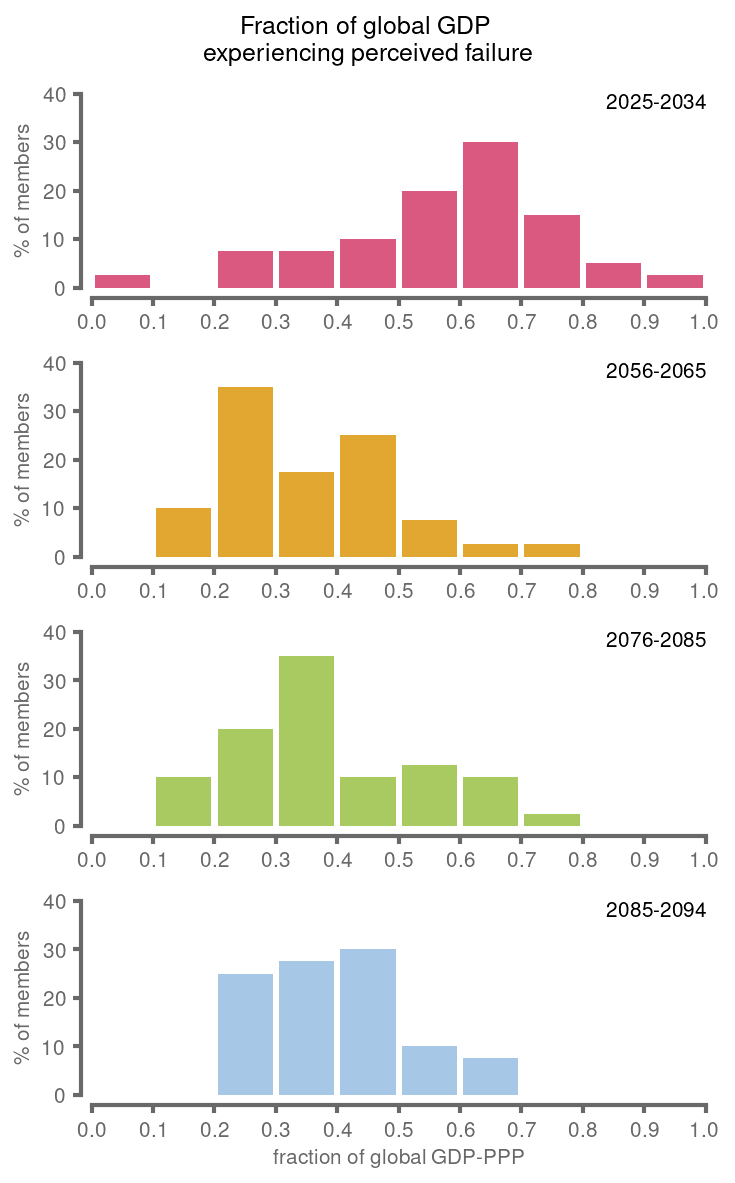

In [20]:
colors = ('#D95980','#E1A730','#A9C961','#A7C7E7',) #A7C7E7 #C3B1E1
x_plot = np.arange(0,1.1,.1)

fig = plt.figure(figsize=(5,2*len(PLOT_YEARS)))
for i,year in enumerate(PLOT_YEARS):
    
    ax = fig.add_subplot(len(PLOT_YEARS),1,i+1)
    
    heights, bins = np.histogram(fail_grid_fix[i,:],np.arange(0,1.1,.1))
    plt.bar((bins[:-1]+(bins[1]-bins[0])/2),100*heights/da_all.shape[0],color=colors[i],width=.09)
    plots.format_spines(ax)
    plt.xticks(np.arange(0,1.1,.10),np.round(np.arange(0,1.1,.10),2))
    plt.yticks(np.arange(0,120,10),np.arange(0,120,10))
    plt.ylim(0,40)
    plt.xlim(0,1.00)    
    plt.ylabel('\% of members') 
    plt.text(1.,40,str(year)+'-'+str(year+settings["time_horizon"]-1),color="k",verticalalignment='top',horizontalalignment='right')
    
plt.suptitle('Fraction of global GDP\nexperiencing perceived failure')     
plt.xlabel('fraction of global GDP-PPP')

plt.tight_layout()
plt.savefig(FIGURE_DIRECTORY + EXP_NAME + '_gdp_histogram' + '.png' , bbox_inches="tight", dpi=savefig_dpi)
plt.show()
